In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics as diag
import numpy.ma as ma
from iosubdomains import Variable

In [2]:
exp = diag.plume('../../data/Nyles/plume_nonrot/', 'plume_nonrot')
time = exp.time/3600/24
r_lim = 0.4
z_lim = 0.6

dx = exp.params['dx']
dy = exp.params['dy']
dz = exp.params['dz']

In [3]:
Ea = exp.Volume_integral('APE', r_lim, z_lim)

In [4]:
Ek = exp.Volume_integral('KE', r_lim, z_lim)

In [5]:
Volume = np.pi*(exp.params['Lx']*r_lim)**2 * (exp.params['Lz']*z_lim)

In [6]:
Lateral_surf = 2*np.pi*(exp.params['Lx']*r_lim) * (exp.params['Lz']*z_lim)

In [7]:
Volume

9650972631.827845

In [8]:
Volume/Lateral_surf

800.0

In [108]:
time[48]

1.0003050080178288

In [112]:
48*4

192

In [116]:
np.mean(Ea[192:]/Volume)

0.007464891773731624

In [117]:
np.std(Ea[192:]/Volume)

0.0006256308098271516

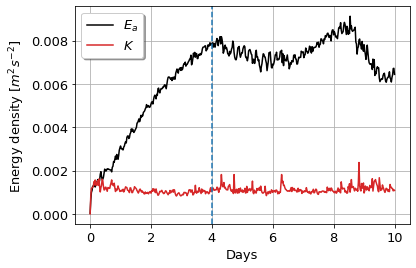

In [121]:
plt.rcParams.update({'font.size': 13})
plt.plot(time, Ea/Volume, label='$E_a$', color='k')
plt.plot(time, Ek/Volume, label='$K$', color='tab:red')
plt.axvline(4, ls='--')
plt.legend(shadow=True, fontsize=13)
plt.grid()
plt.xlabel('Days')
plt.ylabel(r'Energy density [$m^2 s^{-2}$]')
plt.savefig('../../stage_M2/LES/figs/Ea_K_norot', facecolor=(1,0,0,0), bbox_inches='tight', dpi=100)

In [17]:
ϕb = exp.Volume_integral('phi_b', r_lim, z_lim)

In [18]:
ϕz = exp.Volume_integral('phi_z', r_lim, z_lim)

In [19]:
ϕp = exp.vertical_pressure_flux(r_lim, z_lim)

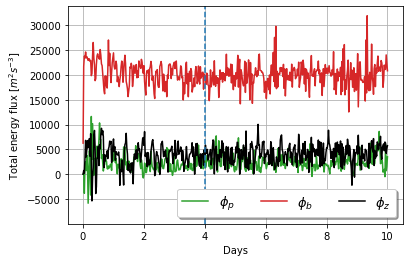

In [20]:
plt.plot(time, ϕp, label='$\phi_{p}$', c='tab:green')
plt.plot(time, ϕb, label='$\phi_{b}$', c='tab:red')
plt.plot(time, ϕz, label='$\phi_{z}$', c='k')
plt.axvline(4, ls='--', c='tab:blue')
plt.legend(fontsize=13, shadow=True, ncol=3)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Total energy flux [$m^2 s^{-3}$]')
plt.ylim(-9999,)
plt.savefig('../../stage_M2/LES/figs/total_fluxes_norot', facecolor=(1,0,0,0), bbox_inches='tight', dpi=100)

ϕ_E1 = exp.Lateral_flux('br_times_z', r_lim, z_lim)

ϕ_E2 = exp.Volume_integral('Q_times_z', r_lim, z_lim)

ϕ_E3 = exp.Lateral_flux('pr', r_lim, z_lim)

plt.plot(time, ϕ_E1/Lateral_surf, label='$\phi_{E_1}$')
plt.plot(time, ϕ_E2/Volume, label='$\phi_{E_2}$')
plt.plot(time, ϕ_E3/Lateral_surf, label='$\phi_{E_3}$')
#plt.plot(time, ϕ_E, label='$\phi_{E}$')
plt.legend(fontsize=14)
plt.xlabel('Days')

In [26]:
ϕb_mean = np.mean(ϕb[192:])
ϕb_std = np.std(ϕb[192:])
print(f'ϕb = {ϕb_mean} +- {ϕb_std}')

ϕb = 19952.293977482692 +- 2411.598345284231


In [27]:
ϕz_mean = np.mean(ϕz[192:])
ϕz_std = np.std(ϕz[192:])
print(f'ϕz = {ϕz_mean} +- {ϕz_std}')

ϕz = 4185.429673179014 +- 1847.6039390569397


In [29]:
ϕp_mean = np.mean(ϕp[192:])
ϕp_std = np.std(ϕp[192:])
print(f'ϕp = {ϕp_mean} +- {ϕp_std}')

ϕp = 2528.927437773261 +- 1522.9576808067643


In [31]:
ϕp_mean/ϕz_mean *100

60.42217012936767

In [32]:
ϵ_k = ϕz - ϕp

In [33]:
begin_time_stable = np.where(time>=4)[0]
ϵ_k_mean = np.mean(ϵ_k[192:])
ϵ_k_std = np.std(ϵ_k[192:])
print(rf'ϵ_k = {ϵ_k_mean} +- {ϵ_k_std}')

ϵ_k = 1656.502235405753 +- 2283.387334056151


In [34]:
ϵ_k_mean/ϕz_mean *100

39.577829870632335

Text(0.5, 0, 'Days')

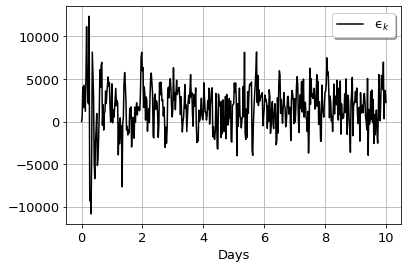

In [102]:
plt.plot(time, ϵ_k, label='ϵ$_k$', color='k')
plt.legend(fontsize=13, shadow=True, ncol=3)
plt.grid()
plt.xlabel('Days')
#plt.savefig('../../Desktop/figs_plume/expsilon_k')

In [103]:
ε = (ϕb - ϕz)/(ϕb + ϕp)

In [104]:
ε_mean = np.mean(ε[192:])
ε_std = np.std(ε[192:])
print(rf'ε_mean = {ε_mean} +- {ε_std}')

ε_mean = 0.7033012094864654 +- 0.09844958389055926


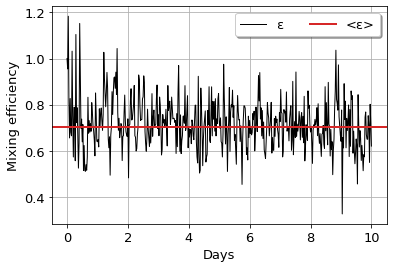

In [105]:
plt.plot(time, ε, label='ε', color='k', lw=1)
plt.axhline(ε_mean,c='tab:red', label='<ε>', lw=2)
plt.legend(fontsize=13, shadow=True, ncol=3)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Mixing efficiency')
plt.savefig('../../stage_M2/LES/figs/mixing_efficiency', facecolor=(1,0,0,0), bbox_inches='tight', dpi=100)

In [35]:
ϕ_k = exp.Surface_flux('KE', r_lim, z_lim)

In [36]:
ϕ_Ea = exp.Surface_flux('APE', r_lim, z_lim)

Text(0.5, 0, 'Days')

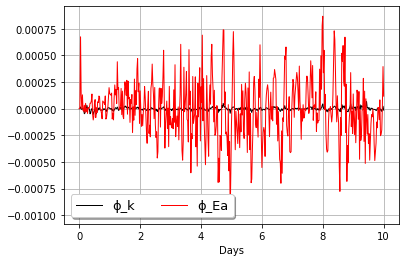

In [38]:
plt.plot(time, ϕ_k, label='ϕ_k', color='k', lw=1)
plt.plot(time, ϕ_Ea, label='ϕ_Ea', color='red', lw=1)
#plt.axhline(ε_mean,c='tab:red', label='<ε>', lw=2)
plt.legend(fontsize=13, shadow=True, ncol=3)
plt.grid()
plt.xlabel('Days')
#plt.ylabel('Mixing efficiency')